### Подключение библиотек

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
import seaborn as sns
import pickle as pkl

import json
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.decomposition import *
from pprint import pprint
from sklearn.preprocessing import *
from sklearn.neighbors import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.svm import *
from sklearn.metrics import *
from sklearn.tree import *

### Обучение и выполнение лучшей модели

In [5]:
# Путь к тренировочному набору
path_train =  "train.csv"
# Путь к тестовому набору
path_test  =  "test.csv"

In [6]:
data = pd.read_csv(path_train)

In [7]:
data

,ID,Brand,Model,Year_of_production,Type,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box,Drive_wheels,Doors,Color,Airbags,Tax,Price
0,45774636,OPEL,Combo,2003,Goods wagon,No,Diesel,1.7,152000 km,4.0,Manual,Front,04-May,Grey,2,1438,9408
1,45787352,MERCEDES-BENZ,Vito,2008,Minivan,No,Diesel,2.2 Turbo,198700 km,4.0,Manual,Rear,02-Mar,White,6,1195,17000
2,45393419,TOYOTA,CHR,2018,Jeep,No,Petrol,2,37214 km,4.0,Automatic,Front,04-May,Grey,10,1079,36065
3,45802407,HYUNDAI,Grandeur,2012,Sedan,Yes,Petrol,3,137235 km,4.0,Automatic,Front,04-May,Silver,4,919,15524
4,45647870,MERCEDES-BENZ,ML 350,2015,Jeep,Yes,Diesel,3.5,79080 km,6.0,Automatic,4x4,04-May,Grey,12,1273,22894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7231,45768179,LEXUS,CT 200h,2014,Hatchback,Yes,Hybrid,1.8,132563 km,4.0,Automatic,Front,04-May,Red,0,308,11447
7232,45621866,HYUNDAI,Sonata,2014,Sedan,No,Petrol,2.4,148800 km,4.0,Tiptronic,Front,04-May,Black,6,749,18503
7233,45732832,HYUNDAI,Sonata,2015,Sedan,Yes,LPG,2,283895 km,4.0,Automatic,Front,04-May,Silver,4,765,15367
7234,45802992,HYUNDAI,Santa FE,2010,Jeep,Yes,Diesel,2,229398 km,4.0,Automatic,Front,04-May,Black,4,836,19008


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7236 entries, 0 to 7235
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  7236 non-null   int64  
 1   Brand               7236 non-null   object 
 2   Model               7236 non-null   object 
 3   Year_of_production  7236 non-null   int64  
 4   Type                7236 non-null   object 
 5   Leather_interior    7236 non-null   object 
 6   Fuel_type           7236 non-null   object 
 7   Engine_volume       7236 non-null   object 
 8   Mileage             7236 non-null   object 
 9   Cylinders           7236 non-null   float64
 10  Gear_box            7236 non-null   object 
 11  Drive_wheels        7236 non-null   object 
 12  Doors               7236 non-null   object 
 13  Color               7236 non-null   object 
 14  Airbags             7236 non-null   int64  
 15  Tax                 7236 non-null   int64  
 16  Price 

In [9]:
data.describe()

,ID,Year_of_production,Cylinders,Airbags,Tax,Price
count,7.236000e+03,7236.000000,7236.000000,7236.000000,7236.000000,7236.000000
mean,4.566946e+07,2013.227059,4.395108,6.276810,861.030127,22019.489635
std,4.604860e+05,3.034425,1.015389,3.990426,357.471378,14723.508733
min,3.255807e+07,1965.000000,1.000000,0.000000,87.000000,3500.000000
25%,4.573043e+07,2011.000000,4.000000,4.000000,640.000000,11604.000000
50%,4.578219e+07,2013.000000,4.000000,4.000000,777.000000,17876.000000
75%,4.580327e+07,2015.000000,4.000000,12.000000,1017.000000,28225.000000
max,4.581665e+07,2020.000000,12.000000,16.000000,5603.000000,83891.000000


In [10]:
data["Mileage"] = data["Mileage"].apply(lambda value: int(re.findall(r'\d+', value)[0]))
data["is_turbo"] = data["Engine_volume"].apply(lambda value: int("Turbo" in value))
data["Engine_volume"] = data["Engine_volume"].apply(lambda value: float(re.findall(r'\d*\.\d+|\d+', value)[0]))

In [11]:
data.describe()

,ID,Year_of_production,Engine_volume,Mileage,Cylinders,Airbags,Tax,Price,is_turbo
count,7.236000e+03,7236.000000,7236.000000,7.236000e+03,7236.000000,7236.000000,7236.000000,7236.000000,7236.000000
mean,4.566946e+07,2013.227059,2.232380,4.283908e+05,4.395108,6.276810,861.030127,22019.489635,0.074489
std,4.604860e+05,3.034425,0.785765,2.524399e+07,1.015389,3.990426,357.471378,14723.508733,0.262583
min,3.255807e+07,1965.000000,0.000000,0.000000e+00,1.000000,0.000000,87.000000,3500.000000,0.000000
25%,4.573043e+07,2011.000000,1.800000,6.502775e+04,4.000000,4.000000,640.000000,11604.000000,0.000000
50%,4.578219e+07,2013.000000,2.000000,1.110000e+05,4.000000,4.000000,777.000000,17876.000000,0.000000
75%,4.580327e+07,2015.000000,2.500000,1.640000e+05,4.000000,12.000000,1017.000000,28225.000000,0.000000
max,4.581665e+07,2020.000000,20.000000,2.147484e+09,12.000000,16.000000,5603.000000,83891.000000,1.000000


In [12]:
categorical_features = ['Brand', 'Model', 'Year_of_production', 'Type',
                        'Leather_interior', 'Fuel_type',
                        'Cylinders', 'Gear_box', 'Drive_wheels', 'Doors', 'Color', 'Airbags']


In [13]:
X = data.drop(["Price", "ID"], axis=1)
Y = data["Price"]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle = True, random_state = 42)

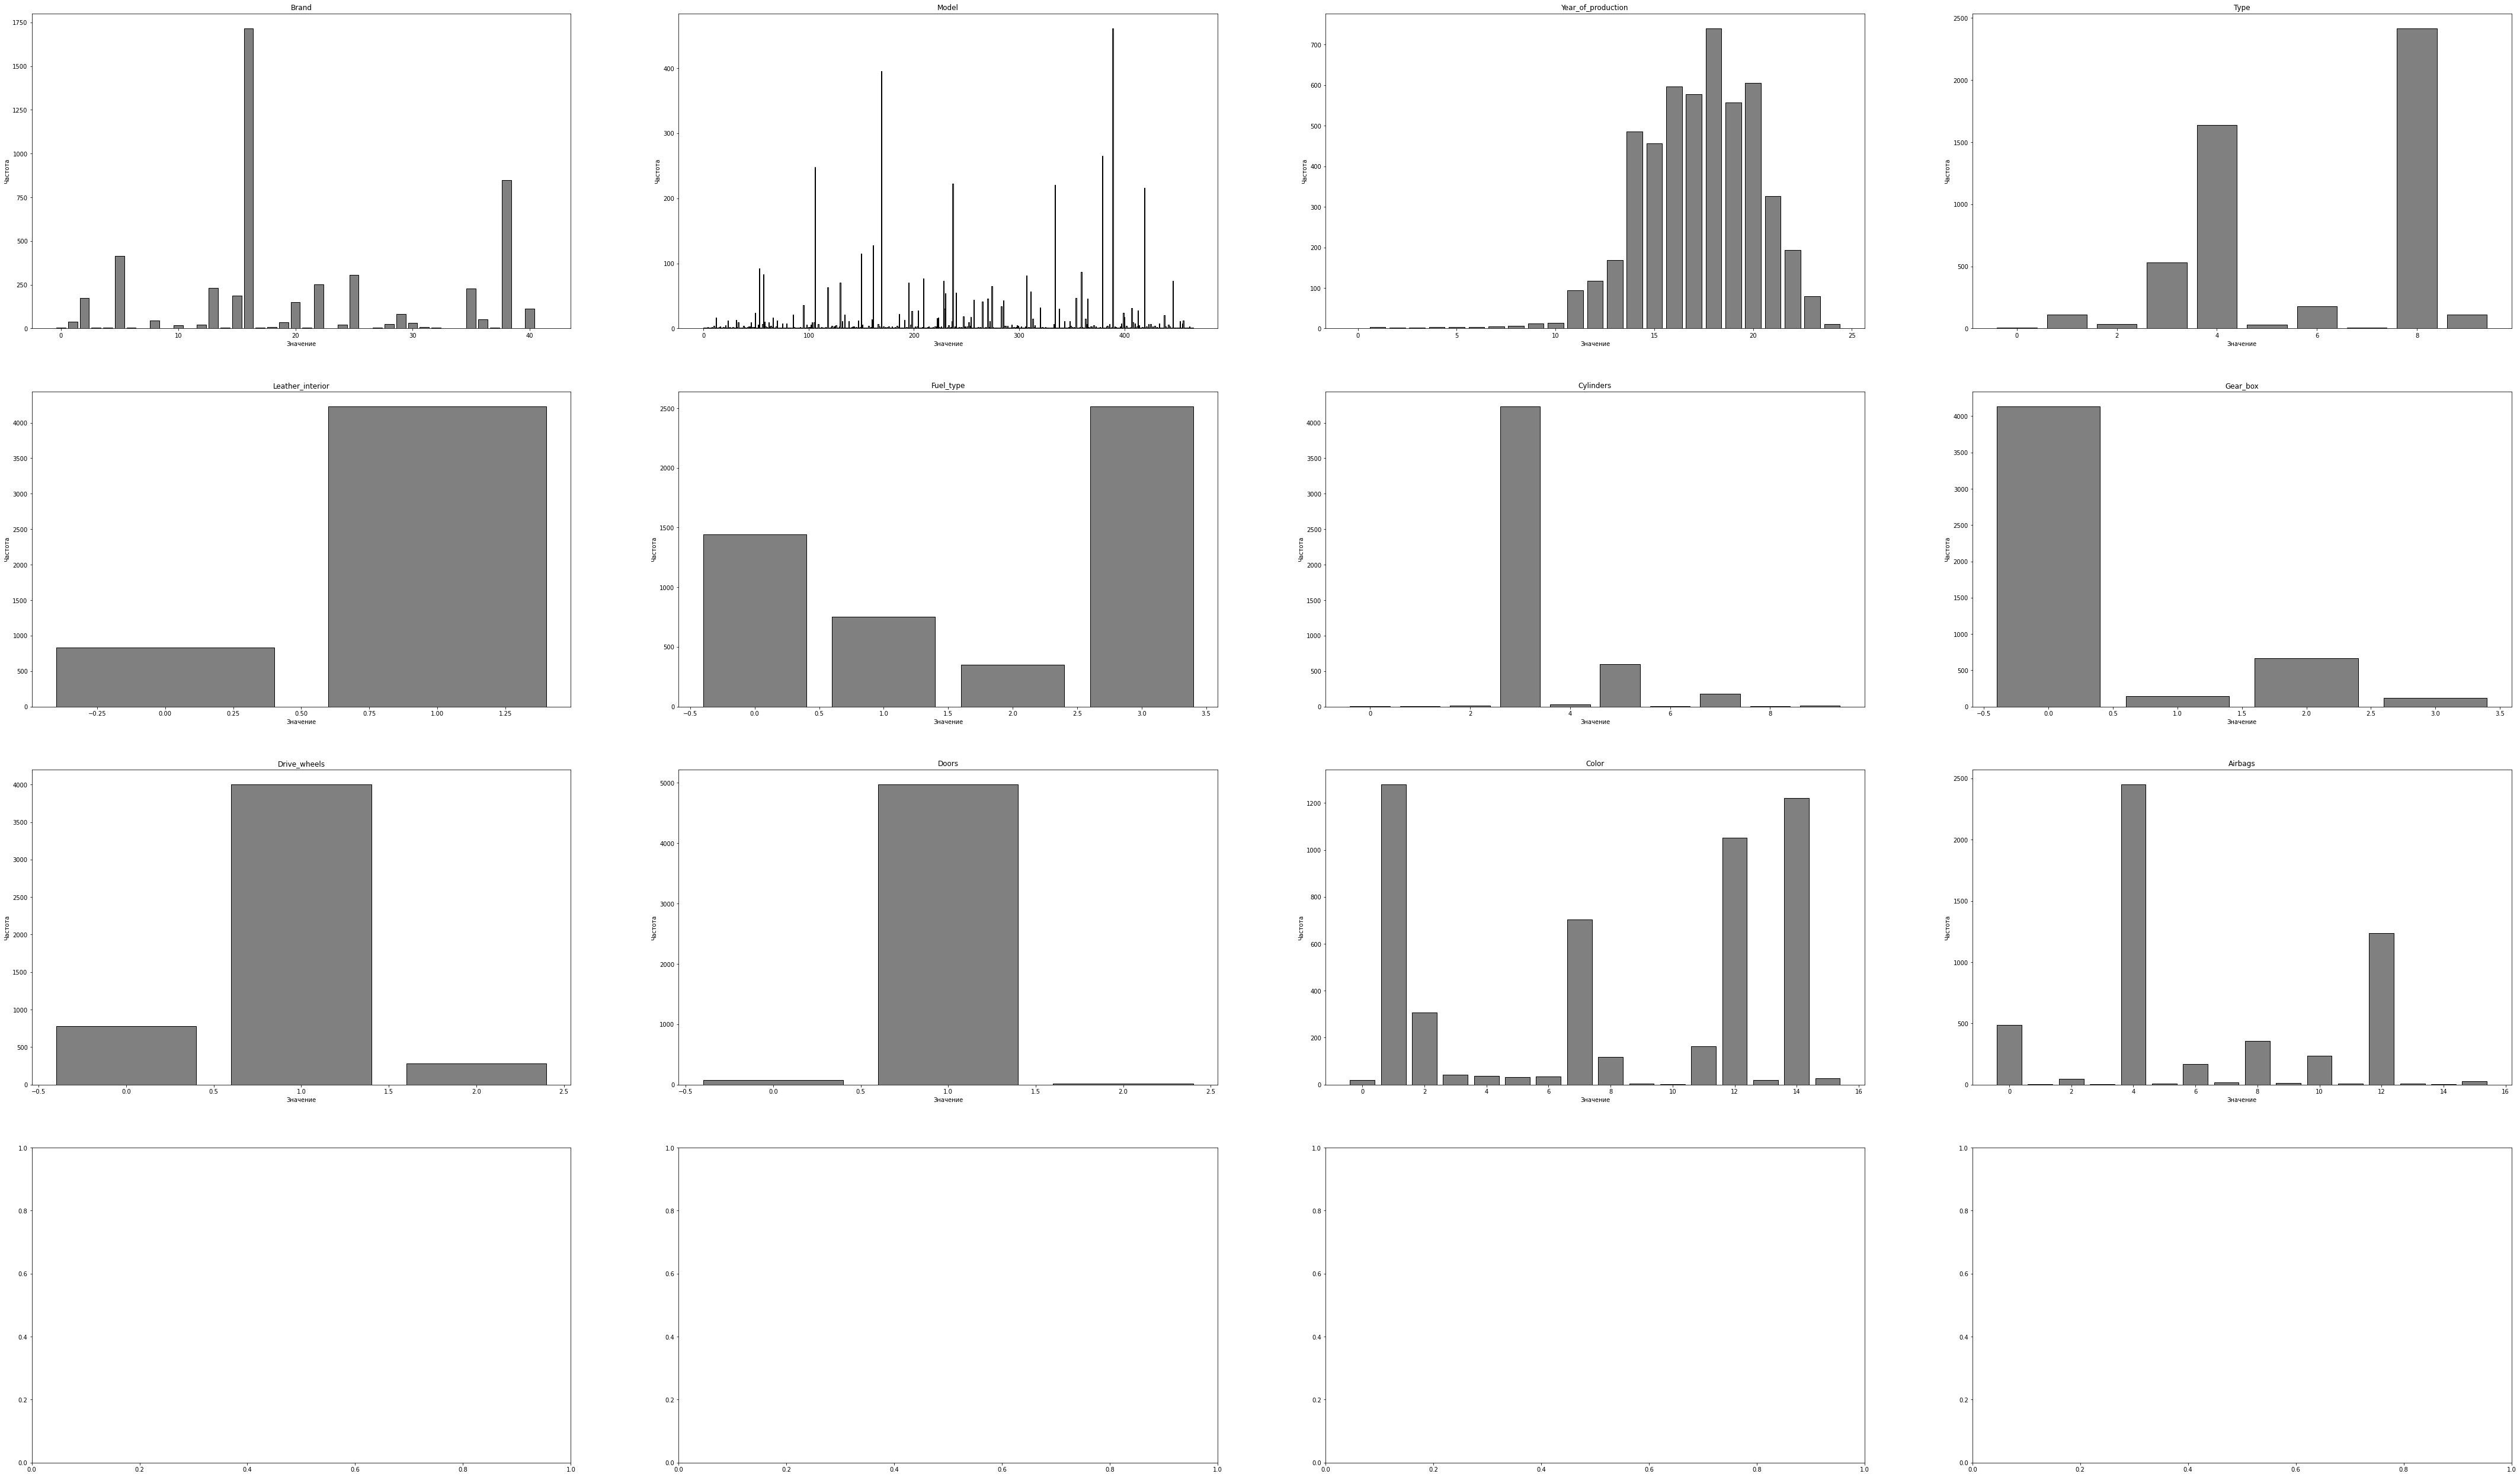

In [15]:
binging_featuresfig, axs = plt.subplots(nrows= 4 , ncols= 4 )

fig.set_figheight(45)
fig.set_figwidth(75)

le = LabelEncoder()

for i in range(len(categorical_features)):
    current_feature = categorical_features[i]
    le.fit(x_train[current_feature])
    bins = np.bincount(le.transform(x_train[current_feature]))
    
    axs[i // 4, i % 4].set_title(current_feature)
    axs[i // 4, i % 4].bar(range(len(bins)), bins, color='gray', edgecolor='black')
    axs[i // 4, i % 4].set_ylabel("Частота")
    axs[i // 4, i % 4].set_xlabel("Значение")

In [16]:
scale_features = ["Mileage", "Tax", "Engine_volume"]
scaler = RobustScaler()

x_train[scale_features] = scaler.fit_transform(x_train[scale_features])

In [17]:
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index (drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index (drop=True, inplace=True)

In [18]:
def create_target_feature_encoding(X, Y, features):
  features_values_targets = {}
  
  for feature in features:
    features_values_targets[feature] = {}
    for value in set(X[feature]):
      features_values_targets[feature][value] = np.mean(Y[X[feature] == value])

  return features_values_targets

In [19]:
features_values_targets = create_target_feature_encoding(x_train, y_train, categorical_features)
  
for feature in categorical_features:
  x_train[feature] = x_train[feature].replace(features_values_targets[feature])
  x_test[feature]  = x_test [feature].replace(features_values_targets[feature])


default_values = dict(x_train[categorical_features].median())
default_values.update(x_train[set(x_train.columns) - set(categorical_features)].mean())
  
x_train = x_train.fillna(default_values)
x_test  = x_test. fillna(default_values)

/tmp/ipykernel_7629/4098076129.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  default_values.update(x_train[set(x_train.columns) - set(categorical_features)].mean())


In [42]:
categorical_features

['Brand',
 'Model',
 'Year_of_production',
 'Type',
 'Leather_interior',
 'Fuel_type',
 'Cylinders',
 'Gear_box',
 'Drive_wheels',
 'Doors',
 'Color',
 'Airbags']

In [20]:
power_features = ["Brand", "Model", "Airbags"]
pt = PowerTransformer(method='box-cox')

transformed = pt.fit_transform(x_train[power_features] + 1)
  
x_train[power_features] = transformed 

In [21]:
for feature in power_features:
  x_test[feature] = x_test[feature].apply(lambda value: value if type(value) == np.float64 else 1)

x_test[power_features] = pt.transform(x_test[power_features] + 1)

x_test[scale_features] = scaler.transform(x_test[scale_features])

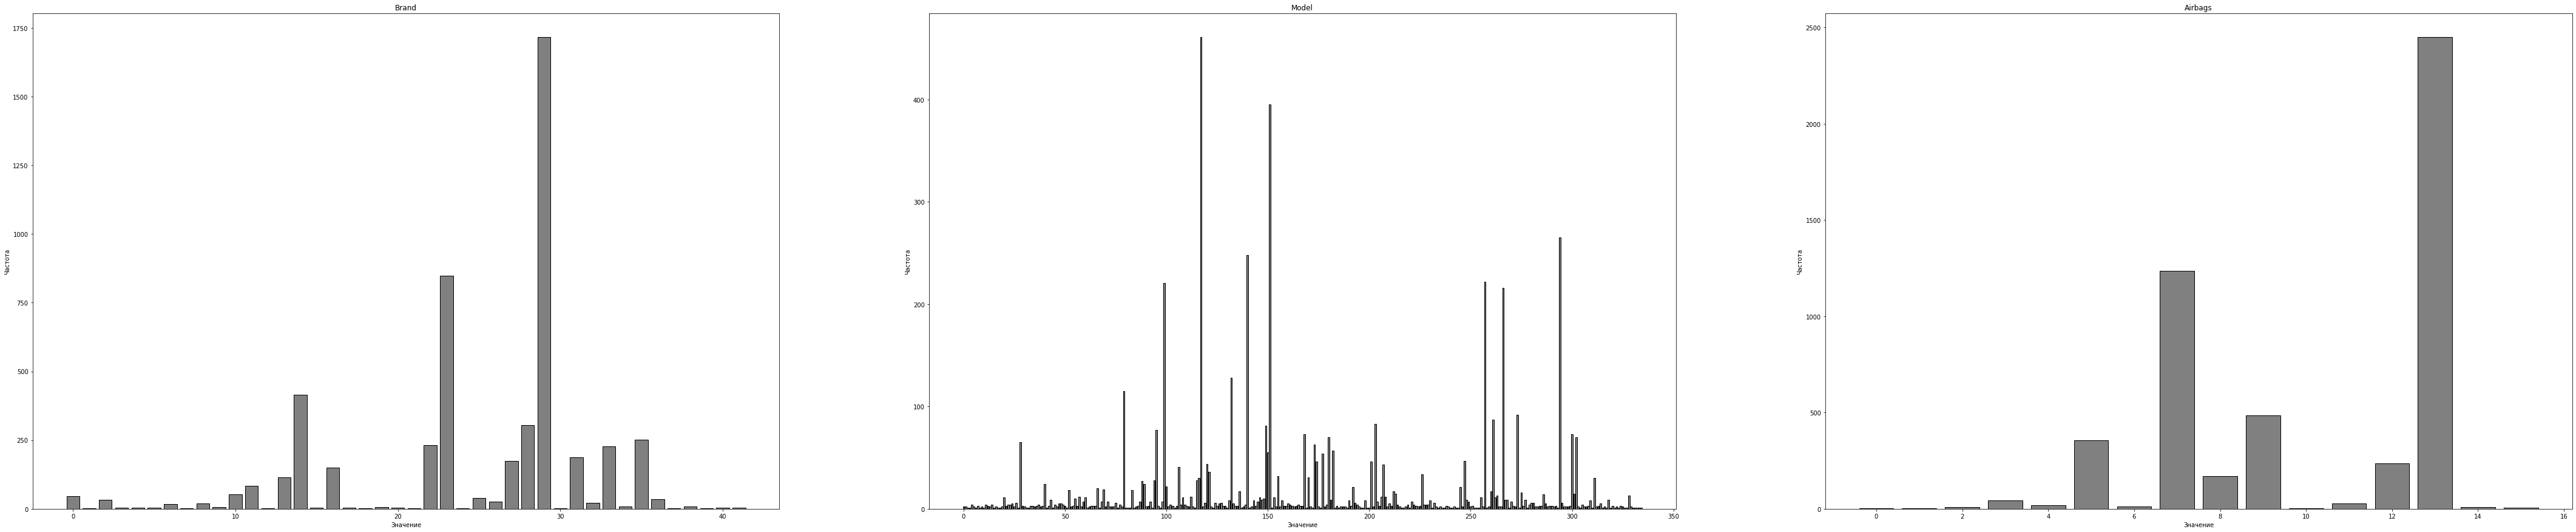

In [22]:
fig, axs = plt.subplots(ncols= len(power_features))

fig.set_figheight(15)
fig.set_figwidth(75)

le = LabelEncoder()

for j in range(len(power_features)):
  current_feature = power_features[j]
  le.fit(x_train[current_feature])
  bins = np.bincount(le.transform(x_train[current_feature]))
    
  axs[j].set_title(current_feature)
  axs[j].bar(range(len(bins)), bins, color='gray', edgecolor='black')
  axs[j].set_ylabel("Частота")
  axs[j].set_xlabel("Значение")

<AxesSubplot:>

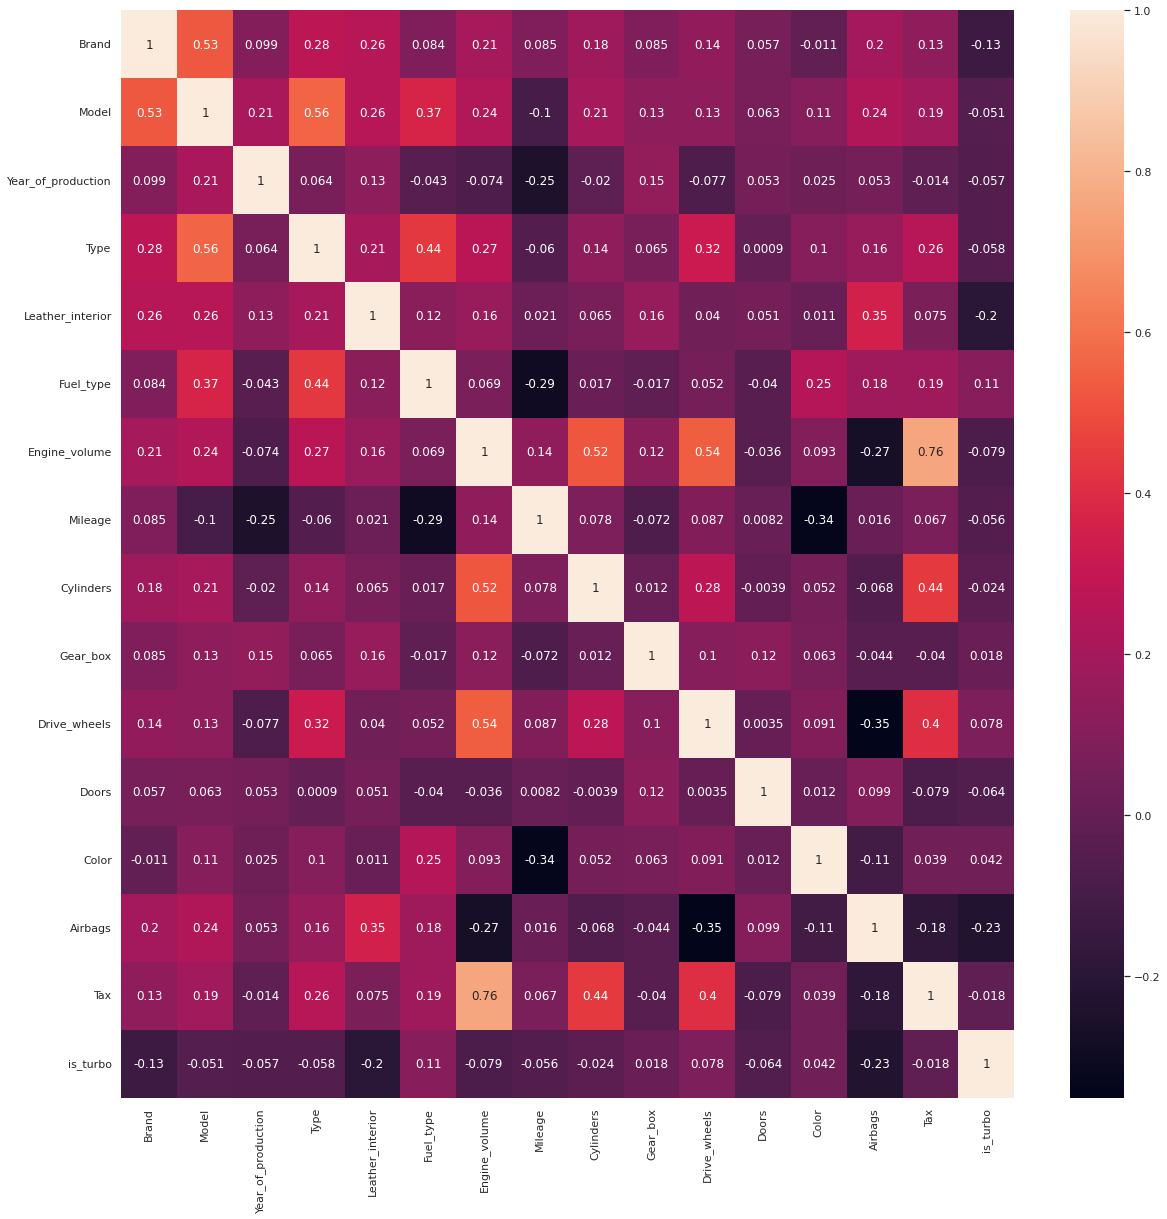

In [23]:
sns.set(rc={'figure.figsize':(20, 20)})

sns.heatmap(x_train.corr(), annot = True)

In [24]:
binging_features = ['Year_of_production', 'Leather_interior',
       'Engine_volume', 'Mileage', 'Cylinders', 'Tax', 'is_turbo']

poly = PolynomialFeatures(degree = 3, include_bias = False)
poly.fit(x_train[binging_features])
  
X_poly = pd.DataFrame(poly.transform(x_train[binging_features]))

x_train = x_train.drop(binging_features, axis=1)
x_train = pd.concat([x_train, X_poly], axis=1)

In [25]:
X_poly = pd.DataFrame(poly.transform(x_test[binging_features]))

x_test = x_test.drop(binging_features, axis=1)
x_test = pd.concat([x_test, X_poly], axis=1)

In [1]:
def print_metrics(targets, preds):
  print("MAE : ", mean_absolute_error(targets, preds))
  print("MSE : ", mean_squared_error(targets, preds))
  print("R2 : ", r2_score(targets, preds))
  print("MAPE : ", mean_absolute_percentage_error(targets, preds))
  
  print("Confusion matrix:\n ", confusion_matrix(targets, preds))
  print("Accuracy : ", accuracy_score(targets, preds))
  print("Precision : ", precision_score(targets, preds))
  print("Recall : ", recall_score(targets, preds))
  print("F1 : ", f1_score(targets, preds))

In [27]:
cv = KFold(n_splits=2, random_state=0, shuffle = True)

In [28]:
x_train = x_train.values
x_test = x_test.values

In [29]:
model = GradientBoostingRegressor(n_estimators = 100, max_depth = 3)

model.fit(x_train, y_train)

boost_preds = model.predict(x_test)
print_metrics(y_test, boost_preds)

MAE :  7343.830419445127
MSE :  120612316.46859087
R2 :  0.4632622469292915
MAPE :  0.4481235509285957


# Test

In [30]:
model = GradientBoostingRegressor(n_estimators = 100, max_depth = 3)

model.fit(np.concatenate([x_train, x_test]), np.concatenate([y_train, y_test]))

GradientBoostingRegressor()

In [31]:
path_test = "test.csv"

In [32]:
data = pd.read_csv(path_test)

In [33]:
test_data = data

In [34]:
test_data["Mileage"] = test_data["Mileage"].apply(lambda value: int(re.findall(r'\d+', value)[0]))
test_data["is_turbo"] = test_data["Engine_volume"].apply(lambda value: int("Turbo" in value))
test_data["Engine_volume"] = test_data["Engine_volume"].apply(lambda value: float(re.findall(r'\d*\.\d+|\d+', value)[0]))

test_data = test_data.drop(["ID"], axis=1)

In [35]:
categorical_features = ['Brand', 'Model', 'Year_of_production', 'Type',
                        'Leather_interior', 'Fuel_type',
                        'Cylinders', 'Gear_box', 'Drive_wheels', 'Doors', 'Color', 'Airbags']
power_features       = ["Brand", "Model", "Airbags"]
scale_features       = ["Mileage", "Tax", "Engine_volume"]
binging_features     = ['Year_of_production', 'Leather_interior',
                        'Engine_volume', 'Mileage', 'Cylinders', 'Tax', 'is_turbo']

In [36]:
for feature in categorical_features:
  test_data[feature]  = test_data[feature].replace(features_values_targets[feature])

test_data = test_data.fillna(default_values)

In [37]:
for feature in power_features:
  test_data[feature] = test_data[feature].apply(lambda value: value if type(value) == np.float64 else 1)

test_data[power_features] = pt.transform(test_data[power_features] + 1)

test_data[scale_features] = scaler.transform(test_data[scale_features])

In [38]:
X_poly = pd.DataFrame(poly.transform(test_data[binging_features]))

test_data = test_data.drop(binging_features, axis=1)
test_data = pd.concat([test_data, X_poly], axis=1)

In [39]:
test_data = pd.DataFrame(test_data)

In [40]:
test_data

,Brand,Model,Type,Fuel_type,Gear_box,Drive_wheels,Doors,Color,Airbags,0,...,109,110,111,112,113,114,115,116,117,118
0,-4.790759,-0.845554,15782.208647,15439.932271,16951.487603,21234.409250,22011.005229,22678.016287,-3.746708,12338.208333,...,1.008964e+13,1.250923e+08,0.0,1550.905437,0.0,0.0,1.922826e-02,0.0,0.0,0.0
1,-4.790759,1.744429,23199.628319,22323.644135,21808.072085,21234.409250,22011.005229,23713.735731,-3.746708,21875.689189,...,1.008964e+13,-3.467905e+07,0.0,119.195163,-0.0,0.0,-4.096850e-04,0.0,-0.0,0.0
2,-4.790759,-0.901537,29127.748931,22323.644135,21808.072085,25696.001280,22011.005229,22579.249795,-3.746708,22887.382406,...,1.008964e+13,1.944504e+08,0.0,3747.502022,0.0,0.0,7.222290e-02,0.0,0.0,0.0
3,-4.790759,-0.621168,17828.023593,22323.644135,21808.072085,21234.409250,22011.005229,22579.249795,-3.746708,33904.362694,...,1.008964e+13,3.740384e+08,0.0,13866.167973,0.0,0.0,5.140398e-01,0.0,0.0,0.0
4,-4.790759,0.816272,29127.748931,22323.644135,21808.072085,21234.409250,22011.005229,19103.110429,-3.746708,12338.208333,...,1.008964e+13,4.508277e+08,0.0,20143.982630,0.0,0.0,9.000779e-01,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,-4.790759,1.156416,29127.748931,26890.966090,21808.072085,21234.409250,22011.005229,23713.735731,-3.746708,16282.306584,...,1.008964e+13,7.307372e+07,0.0,529.232607,0.0,0.0,3.832940e-03,0.0,0.0,0.0
2293,-4.790759,-0.345162,17828.023593,22323.644135,21808.072085,21234.409250,22011.005229,24085.197443,-3.746708,17833.844298,...,1.008964e+13,1.052757e+08,0.0,1098.450327,0.0,0.0,1.146127e-02,0.0,0.0,0.0
2294,-4.790759,-0.345162,17828.023593,15439.932271,21808.072085,21234.409250,22011.005229,22678.016287,-3.746708,20000.395147,...,1.008964e+13,2.477075e+06,0.0,0.608139,0.0,0.0,1.493021e-07,0.0,0.0,0.0
2295,-4.790759,1.416172,17828.023593,22323.644135,21808.072085,21931.489437,22011.005229,23713.735731,-3.746708,32404.180982,...,1.008964e+13,2.972490e+08,0.0,8757.195685,0.0,0.0,2.579940e-01,0.0,0.0,0.0


In [41]:
# Маска отобраных номеров строк для предсказания из тестового набора
mask = test_data.index

# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = model.predict(test_data.loc[mask].values)


In [ ]:
mean_absolute_percentage_error(y_true, y_predict)